In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"klyushnik","key":"0383b36da64c3f3356fff0affef42621"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c contradictory-my-dear-watson

  0% 0.00/1.78M [00:00<?, ?B/s]
100% 1.78M/1.78M [00:00<00:00, 50.4MB/s]


In [7]:
! unzip contradictory-my-dear-watson.zip

Archive:  contradictory-my-dear-watson.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.2+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5195 non-null   object
 1   premise     5195 non-null   object
 2   hypothesis  5195 non-null   object
 3   lang_abv    5195 non-null   object
 4   language    5195 non-null   object
dtypes: object(5)
memory usage: 203.1+ KB


In [12]:
train.head(5)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [13]:
test.head(5)

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [14]:
train.describe(include='all')

,id,premise,hypothesis,lang_abv,language,label
count,12120,12120,12120,12120,12120,12120.000000
unique,12120,8209,12119,15,15,NaN
top,5130fd2cb5,and these comments were considered in formulat...,I am not sure.,en,English,NaN
freq,1,3,2,6870,6870,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.990759
std,NaN,NaN,NaN,NaN,NaN,0.824523
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,2.000000


In [15]:
test.describe(include='all')

,id,premise,hypothesis,lang_abv,language
count,5195,5195,5195,5195,5195
unique,5195,4336,5195,15,15
top,c6d58c3f69,The movie isn't clear on where the secret repo...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",en,English
freq,1,3,1,2945,2945


In [16]:
! pip install squarify
import squarify 

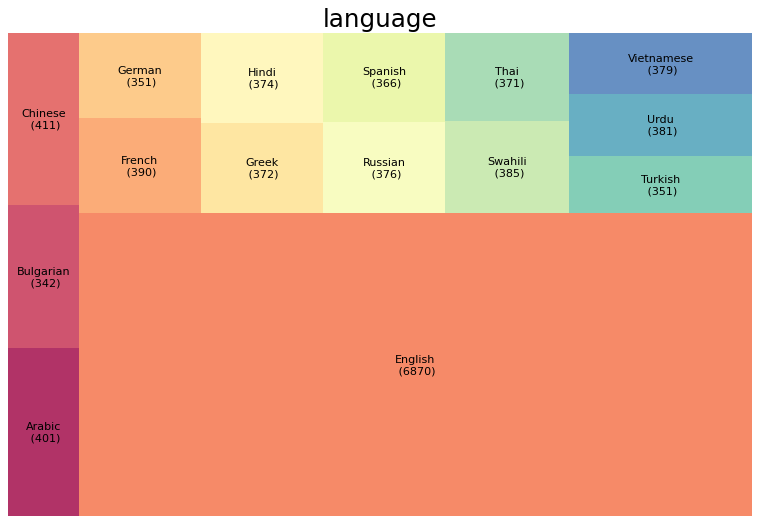

In [17]:
df = train.groupby('language').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('language', size = 22)
plt.axis('off')
plt.show()

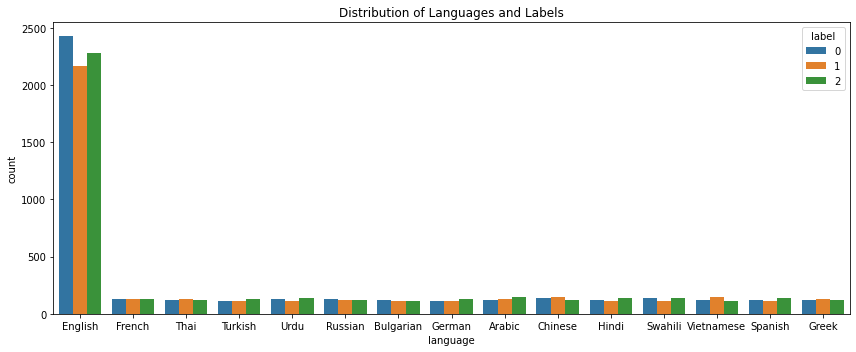

In [18]:
fig, ax = plt.subplots(figsize = (12,5))

#for maximum aesthetics
palette = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True)

graph1 = sns.countplot(train['language'], hue = train['label'])

#set title
graph1.set_title('Distribution of Languages and Labels')

plt.tight_layout()
plt.show()

In [19]:
import tensorflow as tf
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


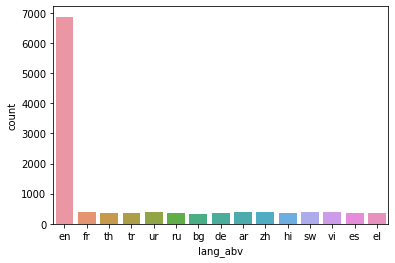

In [20]:
sns.countplot(x='lang_abv',data=train)

In [21]:
df_train_en = train.loc[train.language=='English'].copy()
print(df_train_en.shape)
df_train_fr = train.loc[train.language=='French'].copy()
print(df_train_fr.shape)
df_train_th = train.loc[train.language=='Thai'].copy()
print(df_train_th.shape)
df_train_tr = train.loc[train.language=='Turkish'].copy()
print(df_train_tr.shape)
df_train_ur = train.loc[train.language=='Urdu'].copy()
print(df_train_ur.shape)
df_train_ru = train.loc[train.language=='Russian'].copy()
print(df_train_ru.shape)
df_train_bg = train.loc[train.language=='Bulgarian'].copy()
print(df_train_bg.shape)
df_train_de = train.loc[train.language=='German'].copy()
print(df_train_de.shape)
df_train_ar = train.loc[train.language=='Arabic'].copy()
print(df_train_ar.shape)
df_train_zh = train.loc[train.language=='Chinese'].copy()
print(df_train_zh.shape)
df_train_hi = train.loc[train.language=='Hindi'].copy()
print(df_train_hi.shape)
df_train_sw = train.loc[train.language=='Swahili'].copy()
print(df_train_sw.shape)
df_train_vi = train.loc[train.language=='Vietnamese'].copy()
print(df_train_vi.shape)
df_train_es = train.loc[train.language=='Spanish'].copy()
print(df_train_es.shape)
df_train_ei = train.loc[train.language=='Greek'].copy()
print(df_train_ei.shape)

(6870, 6)
(390, 6)
(371, 6)
(351, 6)
(381, 6)
(376, 6)
(342, 6)
(351, 6)
(401, 6)
(411, 6)
(374, 6)
(385, 6)
(379, 6)
(366, 6)
(372, 6)


In [23]:
! pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=d098a53dba675998c9050cc7ed6cc704cfe37750b58229b4701eca155e5edaf4
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


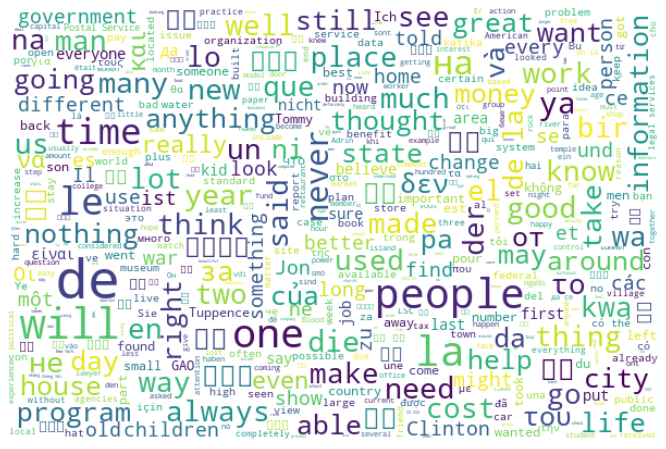

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(txt for txt in train.hypothesis)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

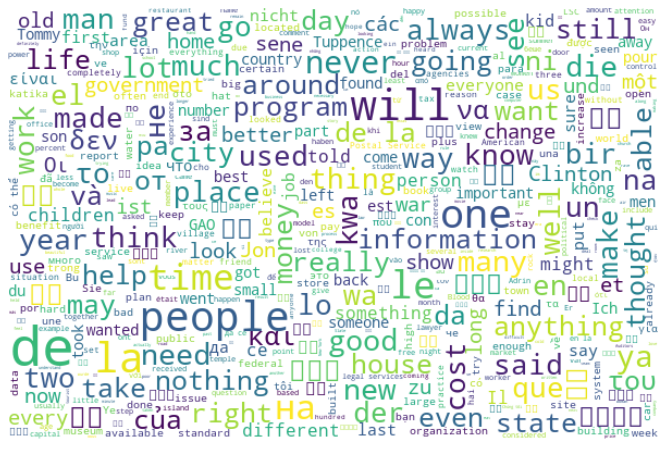

In [28]:
text = " ".join(txt for txt in train.hypothesis)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
train['premise_len'] = pd.to_numeric(list(map(len, train.premise)))
train['hypothesis_len'] = pd.to_numeric(list(map(len, train.hypothesis)))

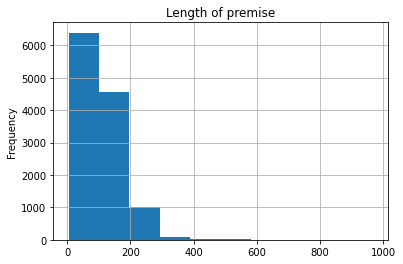

In [30]:
train.premise_len.plot(kind='hist')
plt.title('Length of premise')
plt.grid()
plt.show()

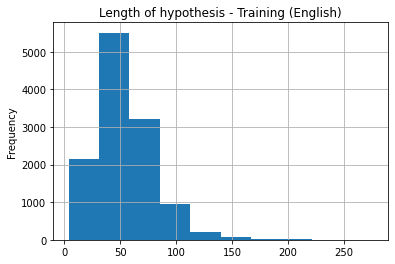

In [31]:
train.hypothesis_len.plot(kind='hist')
plt.title('Length of hypothesis - Training (English)')
plt.grid()
plt.show()

In [32]:
!pip install transformers
from transformers import TFAutoModel,AutoTokenizer
import tensorflow as tf
!pip install sentencepiece

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.5 MB 25.2 MB/s 
     |████████████████████████████████| 77 kB 7.0 MB/s 
     |████████████████████████████████| 596 kB 60.7 MB/s 
     |████████████████████████████████| 895 kB 58.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 5.2 MB/s 


In [33]:
tokenizer=AutoTokenizer.from_pretrained('joeddav/xlm-roberta-large-xnli')
train_enc=tokenizer.batch_encode_plus(train[['premise','hypothesis']].values.tolist(),padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
test_enc=tokenizer.batch_encode_plus(test[['premise','hypothesis']].values.tolist(),padding='max_length',max_length=100,truncation=True,return_attention_mask=True)
train_tf1=tf.convert_to_tensor(train_enc['input_ids'],dtype=tf.int32)
train_tf2=tf.convert_to_tensor(train_enc['attention_mask'],dtype=tf.int32)
train_input={'input_word_ids':train_tf1,'input_mask':train_tf2}
test_tf1=tf.convert_to_tensor(test_enc['input_ids'],dtype=tf.int32)
test_tf2=tf.convert_to_tensor(test_enc['attention_mask'],dtype=tf.int32)
test_input={'input_word_ids':test_tf1,'input_mask':test_tf2}

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/734 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [34]:
train_enc[100]

Encoding(num_tokens=100, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [35]:
with strategy.scope():
    input_ids = tf.keras.Input(shape = (100,), dtype = tf.int32,name='input_word_ids') 
    input_mask=tf.keras.Input(shape=(100,),dtype=tf.int32,name='input_mask')    
    roberta = TFAutoModel.from_pretrained('joeddav/xlm-roberta-large-xnli')
    roberta = roberta([input_ids,input_mask])[0]
    out = tf.keras.layers.GlobalAveragePooling1D()(roberta)
    out = tf.keras.layers.Dense(3, activation = 'softmax')(out)
    model = tf.keras.Model(inputs = [input_ids,input_mask], outputs = out)
    model.compile(
                        optimizer = tf.keras.optimizers.Adam(lr = 1e-5), 
                        loss = 'sparse_categorical_crossentropy', 
                        metrics = ['accuracy']) 
    model.summary()

Downloading:   0%|          | 0.00/2.09G [00:00<?, ?B/s]

Some layers from the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing TFXLMRobertaModel: ['classifier']
- This IS expected if you are initializing TFXLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLMRobertaModel were initialized from the model checkpoint at joeddav/xlm-roberta-large-xnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 100)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 100)]        0           []                               
                                                                                                  
 tfxlm_roberta_model (TFXLMRobe  TFBaseModelOutputWi  559890432  ['input_word_ids[0][0]',         
 rtaModel)                      thPoolingAndCrossAt               'input_mask[0][0]']             
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

In [36]:
strategy.num_replicas_in_sync

1

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience= 10, # stops training after 10 consecutive non-decreases in min val loss
    verbose=1,
    mode='auto',
    restore_best_weights=True)

history=model.fit(train_input,
                  train.label,
                  validation_split=0.2,
                  epochs=50,
                  batch_size=10*strategy.num_replicas_in_sync,
                  callbacks=[early_stopping],
                  verbose=1)

Epoch 1/50
324/970 [=========>....................] - ETA: 8:32:38 - loss: 0.2901 - accuracy: 0.9019

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt

In [ ]:
pred=[np.argmax(i) for i in model.predict(test_input)]
pd.DataFrame(pred).value_counts()

In [ ]:
pd.DataFrame({'id':test.id,
              'prediction':pred}).to_csv('submission.csv',index=False)